In [2]:

from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

__Reading The Sampled data__

In [3]:
reg_train = pd.read_csv('sampled_train_assignment3.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating','avg1','avg2'], header=None)



Text(0, 0.5, 'rating')

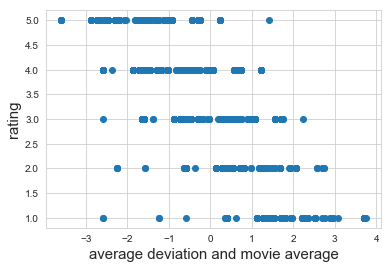

In [82]:
data = np.genfromtxt('sampled_train_assignment4.csv',delimiter=",",names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating','Avg'])
plt.plot(data['Avg'], data['rating'],'o')
plt.xlabel('average deviation and movie average', fontsize=15)
plt.ylabel('rating', fontsize=15)

In [11]:
ratings = pd.read_csv('newFile4.csv',names= ['user', 'movie','UAvg', 'MAvg', 'rating'],header=None)


ratings.head()

,user,movie,UAvg,MAvg,rating
0,39297,33,3.269565,4.143646,5
1,53406,33,3.370370,4.143646,4
2,67390,33,3.833333,4.143646,4
3,99540,33,3.555556,4.143646,3
4,99865,33,3.714286,4.143646,5


In [24]:
ratings[ratings['user'] == 642543]



,user,movie,UAvg,MAvg,rating
9578,642543,1087,4.791667,2.924242,5
8671,642543,937,4.791667,3.746224,4
7959,642543,831,4.791667,3.052441,5
7452,642543,723,4.791667,2.950617,5
4883,642543,607,4.791667,3.545882,5
1509,642543,483,4.791667,3.446231,5


In [23]:
ratings.sort_values(["UAvg","movie"], axis=0, 
                 ascending=False, inplace=True) 
ratings.head(100)

,user,movie,UAvg,MAvg,rating
9639,200061,1098,5.000000,4.070513,5
9647,364225,1098,5.000000,4.070513,5
9603,1735834,1087,5.000000,2.924242,5
8712,803506,937,5.000000,3.746224,5
8927,1659889,937,5.000000,3.746224,5
8942,1747202,937,5.000000,3.746224,5
8988,1935511,937,5.000000,3.746224,5
8997,1953621,937,5.000000,3.746224,5
9054,2228591,937,5.000000,3.746224,5
7974,705595,831,5.000000,3.052441,5


In [22]:
no_of_rated_movies_per_user = ratings.groupby(by='user')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head(10)

user
1300759    20
1227322    14
414536     13
629389     11
2626336    10
1770828    10
1130133    10
2120912     9
1484157     9
1432474     9
Name: rating, dtype: int64

In [57]:
ratings.sort_values(["user","movie"], axis=0, 
                 ascending=True, inplace=True) 

Text(0, 0.5, 'ratings')

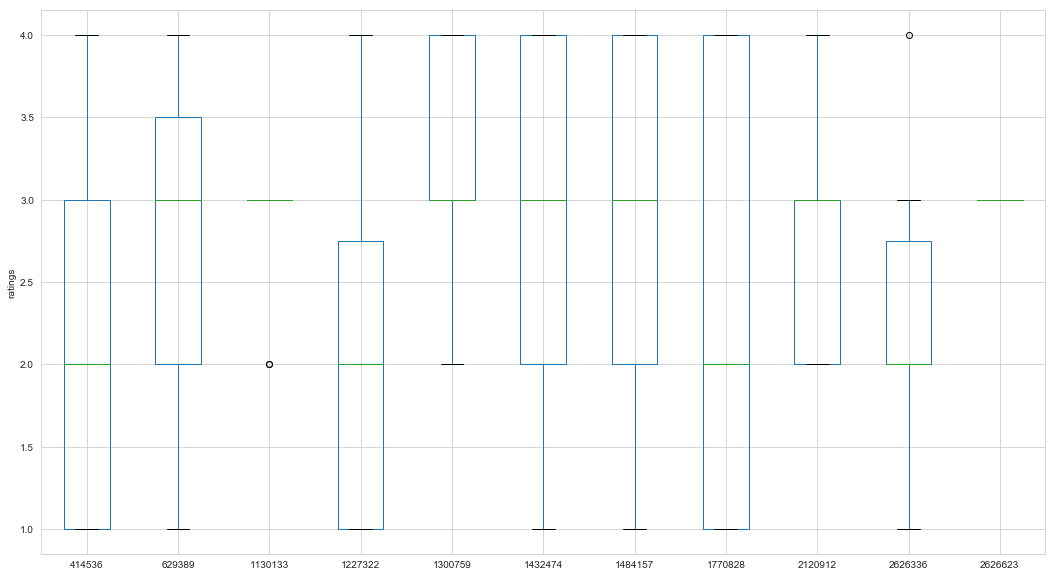

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 10))
ratings.pivot_table(index = 'movie', columns ='user', values = 'rating').plot(ax=ax,kind = 'box')
plt.ylabel('ratings')

In [35]:
def get_average_ratings(sparse_matrix, of_users):
    
    
    ax = 1 if of_users else 0 

    
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    
    is_rated = sparse_matrix!=0
    
    no_of_ratings = is_rated.sum(axis=ax).A1
    
     
    u,m = sparse_matrix.shape
   
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

   
    return average_ratings

In [36]:
sample_train_averages = dict()
global_average = final2.sum()/final2.count_nonzero()
sample_train_averages['global'] = global_average
global_average


-0.017321821811792305

In [38]:
sample_train_averages['movie'] =  get_average_ratings(final2, of_users=False)
print('\n AVerage rating of movie 15153 :',sample_train_averages['movie'][71])


 AVerage rating of movie 15153 : -0.42426603374438887


In [40]:
sample_train_averages['user'] = get_average_ratings(final2, of_users=True)
print('\nAverage rating of user 1515220 :',sample_train_averages['user'][808635])


Average rating of user 1515220 : -1.4242660337443889


In [41]:
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(final2)

In [105]:

reader = Reader(rating_scale=(1,5))

train_data = Dataset.load_from_df(reg_test_df[['user', 'movie', 'rating']], reader = reader)

trainset = train_data.build_full_trainset() 

In [108]:
testset = list(zip(reg_test_df1.user.values, reg_test_df1.movie.values, reg_test_df1.rating.values))
testset[:3]

[(808635, 71, 5), (941866, 71, 4), (1737912, 71, 3)]

In [109]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

In [123]:
from datetime import datetime
from  tqdm import tqdm
from surprise import Reader, Dataset
from surprise import BaselineOnly 
from surprise import accuracy
from surprise import KNNBaseline
from surprise import SVD,SVDpp
from surprise.model_selection import GridSearchCV

In [124]:
start = datetime.now()
bsl_options = {'method': 'sgd','learning_rate':0.001}
print("Estimating biases using sgd with learning rate 0.001...")
for i in tqdm(range(10,200,10)):
    bsl_options['n_epochs']=i
    algo_sgd = BaselineOnly(bsl_options=bsl_options,verbose=False)
    algo_sgd.fit(trainset)
    print('-'*75)
    print("Accuracy for n_epochs :",i)
    predictions = algo_sgd.test(trainset.build_testset())
    print("RMSE on Train data:",accuracy.rmse(predictions))

    predictions = algo_sgd.test(testset)
    print("RMSE on Test data:",accuracy.rmse(predictions))


print("Time taken:",datetime.now()-start)

Estimating biases using sgd with learning rate 0.001...


  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 10
RMSE: 0.9943
RMSE on Train data: 0.9943263152963208
RMSE: 1.0848
RMSE on Test data: 1.0847970358391112


  5%|████▎                                                                              | 1/19 [00:00<00:03,  4.62it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 20
RMSE: 0.9780
RMSE on Train data: 0.9780378128820054
RMSE: 1.0848
RMSE on Test data: 1.0847672410416824


 11%|████████▋                                                                          | 2/19 [00:00<00:03,  4.71it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 30
RMSE: 0.9642
RMSE on Train data: 0.9642199898970776
RMSE: 1.0847
RMSE on Test data: 1.084741779310105


 16%|█████████████                                                                      | 3/19 [00:00<00:03,  4.45it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 40
RMSE: 0.9515
RMSE on Train data: 0.9515483187324613
RMSE: 1.0847
RMSE on Test data: 1.084720246272658


 21%|█████████████████▍                                                                 | 4/19 [00:00<00:03,  4.48it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 50
RMSE: 0.9397
RMSE on Train data: 0.939658413724779
RMSE: 1.0847
RMSE on Test data: 1.0847022098878212


 26%|█████████████████████▊                                                             | 5/19 [00:01<00:03,  4.49it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 60
RMSE: 0.9284
RMSE on Train data: 0.9284035687980233
RMSE: 1.0847
RMSE on Test data: 1.0846873009514946


 32%|██████████████████████████▏                                                        | 6/19 [00:01<00:03,  4.11it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 70
RMSE: 0.9177
RMSE on Train data: 0.9177033013732075
RMSE: 1.0847
RMSE on Test data: 1.0846752078101694


 37%|██████████████████████████████▌                                                    | 7/19 [00:01<00:03,  3.99it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 80
RMSE: 0.9075
RMSE on Train data: 0.9075024774781644
RMSE: 1.0847
RMSE on Test data: 1.0846656611250212


 42%|██████████████████████████████████▉                                                | 8/19 [00:01<00:02,  3.80it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 90
RMSE: 0.8978
RMSE on Train data: 0.8977583226812929
RMSE: 1.0847
RMSE on Test data: 1.084658423088817


 47%|███████████████████████████████████████▎                                           | 9/19 [00:02<00:02,  3.34it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 100
RMSE: 0.8884
RMSE on Train data: 0.8884354840084819
RMSE: 1.0847
RMSE on Test data: 1.08465328066939


 53%|███████████████████████████████████████████▏                                      | 10/19 [00:02<00:02,  3.27it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 110
RMSE: 0.8795
RMSE on Train data: 0.8795037365882743
RMSE: 1.0847
RMSE on Test data: 1.0846500412904232


 58%|███████████████████████████████████████████████▍                                  | 11/19 [00:03<00:02,  2.98it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 120
RMSE: 0.8709
RMSE on Train data: 0.8709367056989943
RMSE: 1.0846
RMSE on Test data: 1.0846485299014863


 63%|███████████████████████████████████████████████████▊                              | 12/19 [00:03<00:02,  2.91it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 130
RMSE: 0.8627
RMSE on Train data: 0.862711052453092
RMSE: 1.0846
RMSE on Test data: 1.0846485868503983


 68%|████████████████████████████████████████████████████████                          | 13/19 [00:03<00:02,  2.97it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 140
RMSE: 0.8548
RMSE on Train data: 0.8548059078063597
RMSE: 1.0847
RMSE on Test data: 1.0846500662376826


 74%|████████████████████████████████████████████████████████████▍                     | 14/19 [00:04<00:01,  2.83it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 150
RMSE: 0.8472
RMSE on Train data: 0.8472024569025565
RMSE: 1.0847
RMSE on Test data: 1.0846528345763546


 79%|████████████████████████████████████████████████████████████████▋                 | 15/19 [00:04<00:01,  2.84it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 160
RMSE: 0.8399
RMSE on Train data: 0.8398836224078429
RMSE: 1.0847
RMSE on Test data: 1.0846567696568628


 84%|█████████████████████████████████████████████████████████████████████             | 16/19 [00:04<00:01,  2.84it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 170
RMSE: 0.8328
RMSE on Train data: 0.832833816776177
RMSE: 1.0847
RMSE on Test data: 1.0846617595584844


 89%|█████████████████████████████████████████████████████████████████████████▎        | 17/19 [00:05<00:00,  2.70it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 180
RMSE: 0.8260
RMSE on Train data: 0.8260387173242633
RMSE: 1.0847
RMSE on Test data: 1.0846677017714499


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 18/19 [00:05<00:00,  2.66it/s]

---------------------------------------------------------------------------
Accuracy for n_epochs : 190
RMSE: 0.8195
RMSE on Train data: 0.8194850848852676
RMSE: 1.0847
RMSE on Test data: 1.0846745024071416


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:06<00:00,  2.53it/s]


Time taken: 0:00:06.097701


In [125]:
from surprise import BaselineOnly 

In [126]:

bsl_options = {'method': 'sgd',
               'learning_rate': .001,
                'n_epochs' : 110}
bsl_algo = BaselineOnly(bsl_options=bsl_options)

bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)



models_evaluation_train['Baseline Train'] = bsl_train_results 
models_evaluation_test['Baseline Test'] = bsl_test_results

Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:00.188990 

Evaluating the model with train data..
time taken : 0:00:00.055870
---------------
Train Data
---------------
RMSE : 0.8795037365882743

MAPE : 28.255795201630583

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.064852
---------------
Test Data
---------------
RMSE : 1.0846500412904232

MAPE : 34.126599919447855

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:00.324629
